In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
DATA_PATH = 'data/parkinsonsdata.csv'
parkinsons_data = pd.read_csv(DATA_PATH)
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [3]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
# parkinsons_data.isnull().sum()

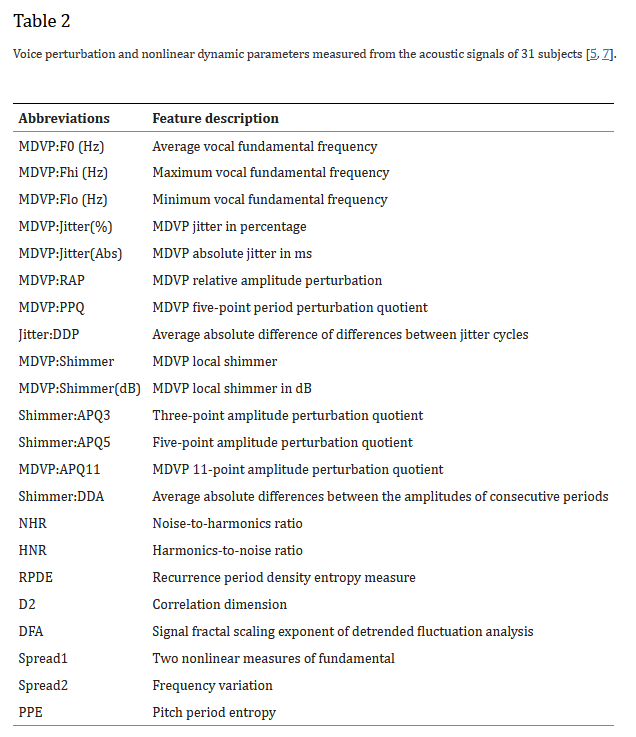 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/)

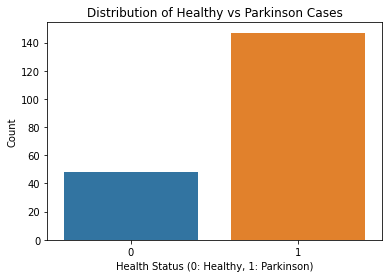

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=parkinsons_data)
plt.title('Distribution of Healthy vs Parkinson Cases')
plt.xlabel('Health Status (0: Healthy, 1: Parkinson)')
plt.ylabel('Count')
plt.show()


### Feature Importance and Selection
- Using a random forest model to determine the importance of features in the dataset.

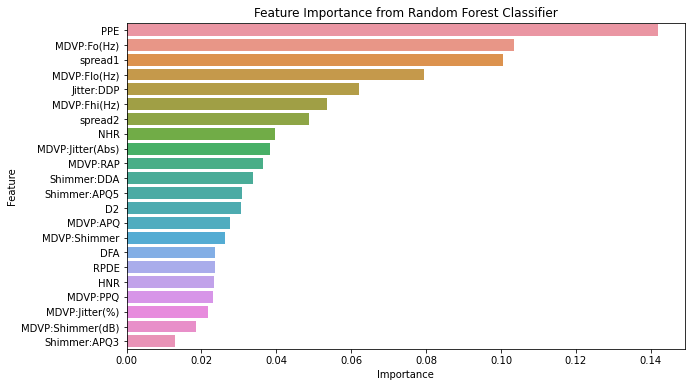

In [11]:
X = parkinsons_data.drop(columns=['status', 'name'])
y = parkinsons_data['status']  # Target variable (health status)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# feature importances from model
feature_importances = rf_classifier.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [9]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



Next, we pick the top n features which do not have a correlation greater than 0.8 with each other.

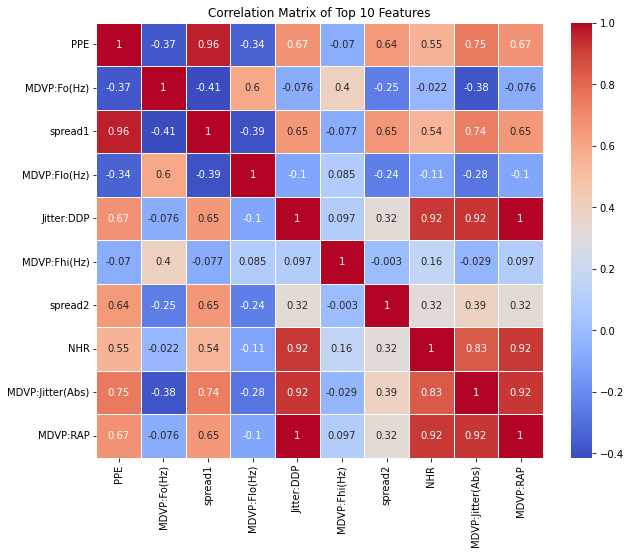

In [30]:
top_10_features = importance_df.head(10)['Feature'].values

# Extract the data for these top 10 features
top_10_data = parkinsons_data[top_10_features]

top_10_corr_matrix = top_10_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Top 10 Features')
plt.show()

In [32]:
# for now, using four features. If a feature pair within these top 4 features has an absolute correlation of 0.7 or higher, we will remove one of the features.
subset = ['PPE', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'Jitter:DDP', 'status']

### Boxplots

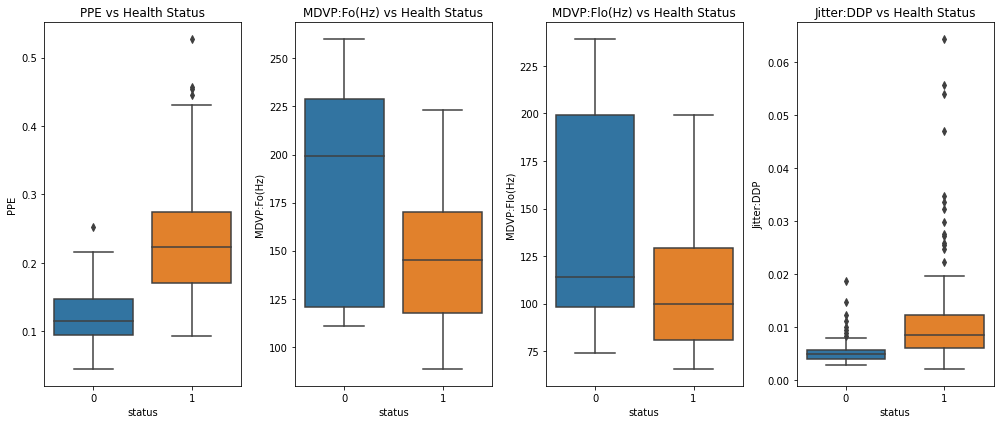

In [33]:
# boxplots key features vs status
plt.figure(figsize=(14, 6))

# PPE
plt.subplot(1, 4, 1)
sns.boxplot(x='status', y='PPE', data=parkinsons_data)
plt.title('PPE vs Health Status')


# MDVP:Fo(Hz)
plt.subplot(1, 4, 2)
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=parkinsons_data)
plt.title('MDVP:Fo(Hz) vs Health Status')

# MDVP:Flo(Hz)
plt.subplot(1, 4, 3)
sns.boxplot(x='status', y='MDVP:Flo(Hz)', data=parkinsons_data)
plt.title('MDVP:Flo(Hz) vs Health Status')

# Jitter:DDP
plt.subplot(1, 4, 4)
sns.boxplot(x='status', y='Jitter:DDP', data=parkinsons_data)
plt.title('Jitter:DDP vs Health Status')

plt.tight_layout()

plt.show()


### Insights on Boxplots:
- **PPE (Pitch Period Entropy)**: Patients with Parkinson's disease have higher PPE values, indicating more irregularity in pitch, which suggests more variability in voice periodicity (i.e. vocal instability).
- **MDVP:Fo(Hz)** Fundamental frequency of the voice varies, but is generally lower for Parkinson's patients, which is a common characteristic (reduction in the pitch of the voice).
- **MDVP:Flo(Hz)** Parkinson's patients have a lower minimum vocal fundamental frequency. Aligns with the previous point.
- **Jitter:DDP** (Average absolute difference in amplitudes of consecutive peroids): Parkinson's patients have higher jitter values (incl. significant outliers), indicating greater variability in voice amplitude. (again, common characteristic)

### Histograms

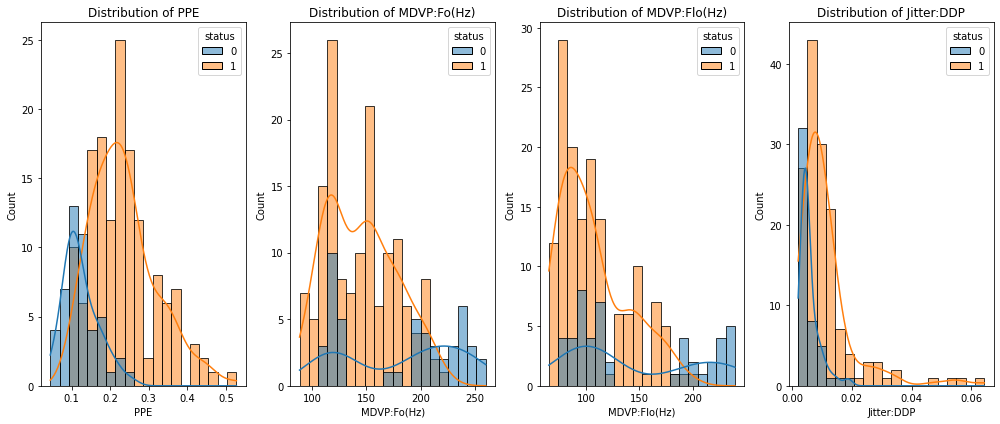

In [34]:
# Histograms of the same features for better distribution visualization

plt.figure(figsize=(14, 6))

# PPE
plt.subplot(1, 4, 1)
sns.histplot(parkinsons_data, x='PPE', hue='status', kde=True, bins=20)
plt.title('Distribution of PPE')

# MDVP:Fo(Hz)
plt.subplot(1, 4, 2)
sns.histplot(parkinsons_data, x='MDVP:Fo(Hz)', hue='status', kde=True, bins=20)
plt.title('Distribution of MDVP:Fo(Hz)')

# MDVP:Flo(Hz)
plt.subplot(1, 4, 3)
sns.histplot(parkinsons_data, x='MDVP:Flo(Hz)', hue='status', kde=True, bins=20)
plt.title('Distribution of MDVP:Flo(Hz)')

# Jitter:DDP
plt.subplot(1, 4, 4)
sns.histplot(parkinsons_data, x='Jitter:DDP', hue='status', kde=True, bins=20)
plt.title('Distribution of Jitter:DDP')

plt.tight_layout()
plt.show()


### Insights on Distribution Patterns:

- **PPE**: The distribution patterns for both Parkinson’s and healthy patients align (with a rightward shift for Parkinson’s patients), suggesting more variability but with a similar underlying distribution.
- **MDVP:Fo(Hz)**: Healthy individuals exhibit a scattered, unclear distribution with no dominant peak (possibly due to lack of data). Parkinson’s patients have a more defined skew toward lower frequencies.
- **MDVP:Flo(Hz)**: Similar to the second histogram, the distribution for healthy individuals is scattered and unclear (again, potentially due to lack of data). Parkinson’s patients show a clear pattern around lower values.
- **Jitter:DDP**: Both groups show similar distribution patterns but with a rightward shift for Parkinson’s patients, indicating more frequent occurrences of higher jitter values.
